<a href="https://colab.research.google.com/github/stalin99835/DUDL/blob/main/NumberHiddenUnits1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())


In [ ]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='setosa'] = 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2



#labels

In [ ]:
def createIrisModel(nHidden):

  ANNiris = nn.Sequential(
      nn.Linear(4,nHidden),
      nn.ReLU(),
      nn.Linear(nHidden,nHidden),
      nn.ReLU(),
      nn.Linear(nHidden,3),
      #nn.Softwax(dim=1)
  )

  lossfun= nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return(ANNiris,lossfun,optimizer)

In [ ]:
createIrisModel(3)

In [33]:
def trainTheModel(ANNiris):
  ongoingAcc = []
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):

    yHat = ANNiris(data)

    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = ANNiris(data)

  predlabels = torch.argmax(predictions,axis=1)
  return 100*torch.mean((predlabels==labels).float())

In [78]:
numepochs = 150
numHiddens = np.arange(1,69,)
#numHiddens = np.linspace(1,3000,14,dtype=int)
accuracies = []

for item,num in enumerate(numHiddens):

  ANNiris,lossfun,optimizer = createIrisModel(num)

  acc = trainTheModel(ANNiris)
  accuracies.append(acc)

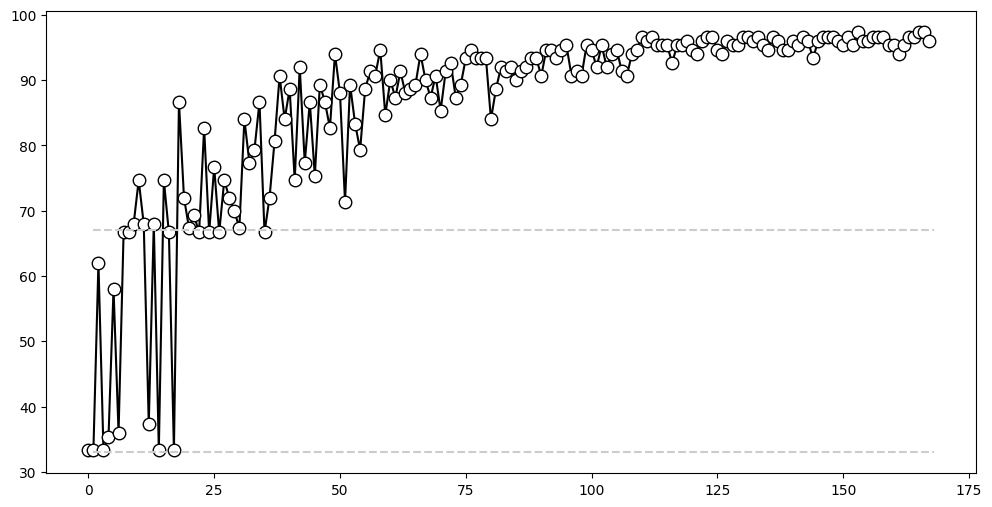

In [53]:
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize = 9)
ax.plot(numHiddens[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numHiddens[[0,-1]],[67,67],'--',color=[.8,.8,.8])
plt.show()

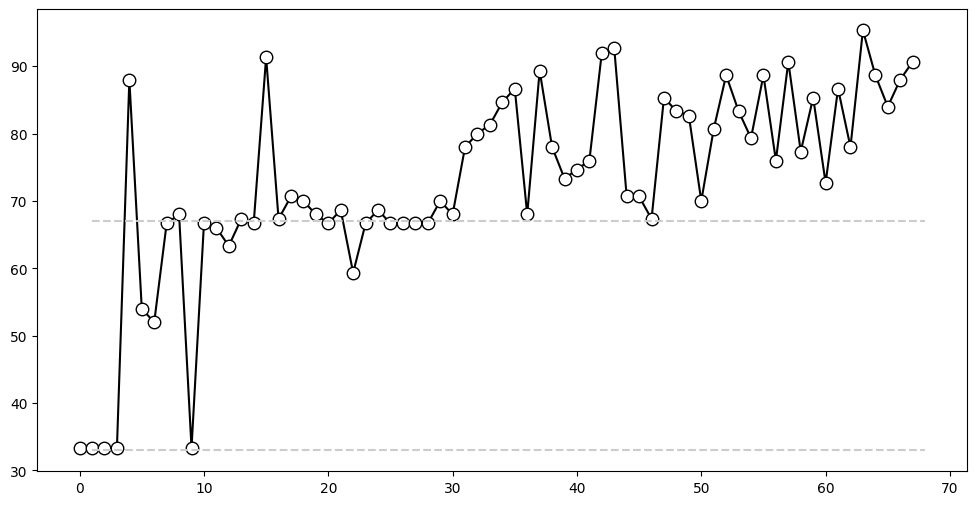

In [79]:
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize = 9)
ax.plot(numHiddens[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numHiddens[[0,-1]],[67,67],'--',color=[.8,.8,.8])
plt.show()

In [70]:
numHiddens = np.linspace(1,128,14,dtype=int)
print(numHiddens)

[  1  10  20  30  40  49  59  69  79  88  98 108 118 128]
